In [1]:
from enterosig.denovo import rank_selection, decompositions, plot_rank_selection
from patchworklib import expand
import numpy as np
import pandas as pd
import logging

<Figure size 100x100 with 0 Axes>

## Read Gut Cell Atlas data

In [2]:
gca = pd.read_csv("/Users/pez23lof/Documents/cellgen/gut_cell_atlas/gca_cell_tables/count.tsv",
                  index_col=0,
                  sep="\t")
print(gca.shape)
gca.head()

(134, 158)


,A26-CAE-0-SC-1,A26-MLN-0-SC-1,A26-SCL-0-SC-1,A26-TCL-0-SC-1,A30-SCL-6-SC-45N-1,A30-SCL-6-SC-45N-2,A30-SCL-6-SC-45P-1,A30-SCL-6-SC-45P-2,A32-APD-0-SC-45N-1,A32-APD-0-SC-45P-1,...,T110-TIL-SC-EPCAMP,T160-TIL-SC-EPCAMP,T161-TIL-SC-EPCAMP,T176-TIL-SC-EPCAMP,T182-TIL-SC-EPCAMP,T189-TIL-SC-EPCAMP,T197-TIL-SC-EPCAMP,T202-TIL-SC-EPCAMP,T203-TIL-SC-EPCAMP,T44-TIL-SC-EPCAMP
cell_type,,,,,,,,,,,,,,,,,,,,,
Activated CD4 T,41,37,4,24,0,0,2,61,0,1,...,0,19,15,58,47,23,240,194,66,27
Activated CD8 T,69,18,60,95,0,0,78,52,0,11,...,4,18,19,13,359,10,746,326,353,217
Activated T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adult Glia,0,0,3,4,3,75,1,4,5,0,...,5,1,1,16,12,19,73,6,19,14
BEST2+ Goblet cell,118,2,473,330,42,231,17,6,24,4,...,0,0,0,1,0,9,0,1,1,0


In [3]:
gca_meta = pd.read_csv("/Users/pez23lof/Documents/cellgen/gut_cell_atlas/gca_cell_tables/sample_metadata.tsv",
                       sep="\t",
                       index_col=0)
# Reorder to match cell table ordering
gca_meta = gca_meta.loc[gca.columns]
gca_meta.head()
assert gca_meta.shape[0] == gca.shape[1], "Data and metadata dimensions do not match"

## Rank Selection

In [8]:
rank_sel_results = rank_selection(x=np.log1p(gca / gca.sum()),
                                  ranks=list(range(2, 20)),
                                  shuffles=100,
                                  seed=4298)

100%|████████████| 1800/1800 [04:55<00:00,  6.10it/s]


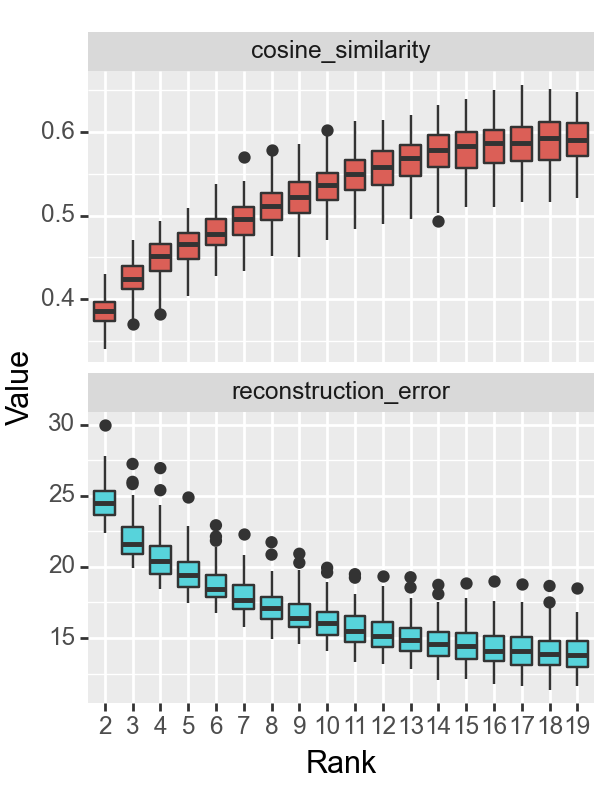

In [11]:
plt_f = plot_rank_selection(
    rank_sel_results,
    jitter=False,
    n_col=1, exclude=['l2_norm', 'sparsity_h', 'sparsity_w', 'rss', 'r_squared']
).draw()
plt_f.set_size_inches(3, 4)
plt_f

## Examine decompositions

In [4]:
decomps = decompositions(
    x=gca,
    ranks=[14],
    random_starts=50,
    seed=4298
)
best_decomp = decomps[14][0]

100%|████████████████| 50/50 [00:03<00:00, 13.90it/s]


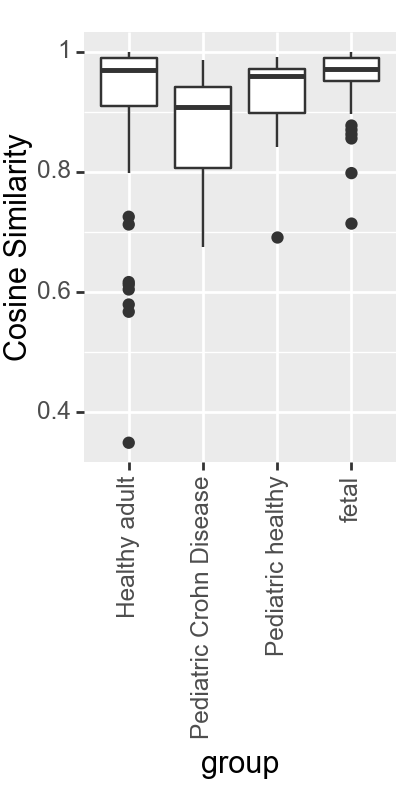

In [9]:
model_fit = best_decomp.plot_modelfit(gca_meta['diagnosis']).draw()
model_fit.set_size_inches(2, 4)
model_fit

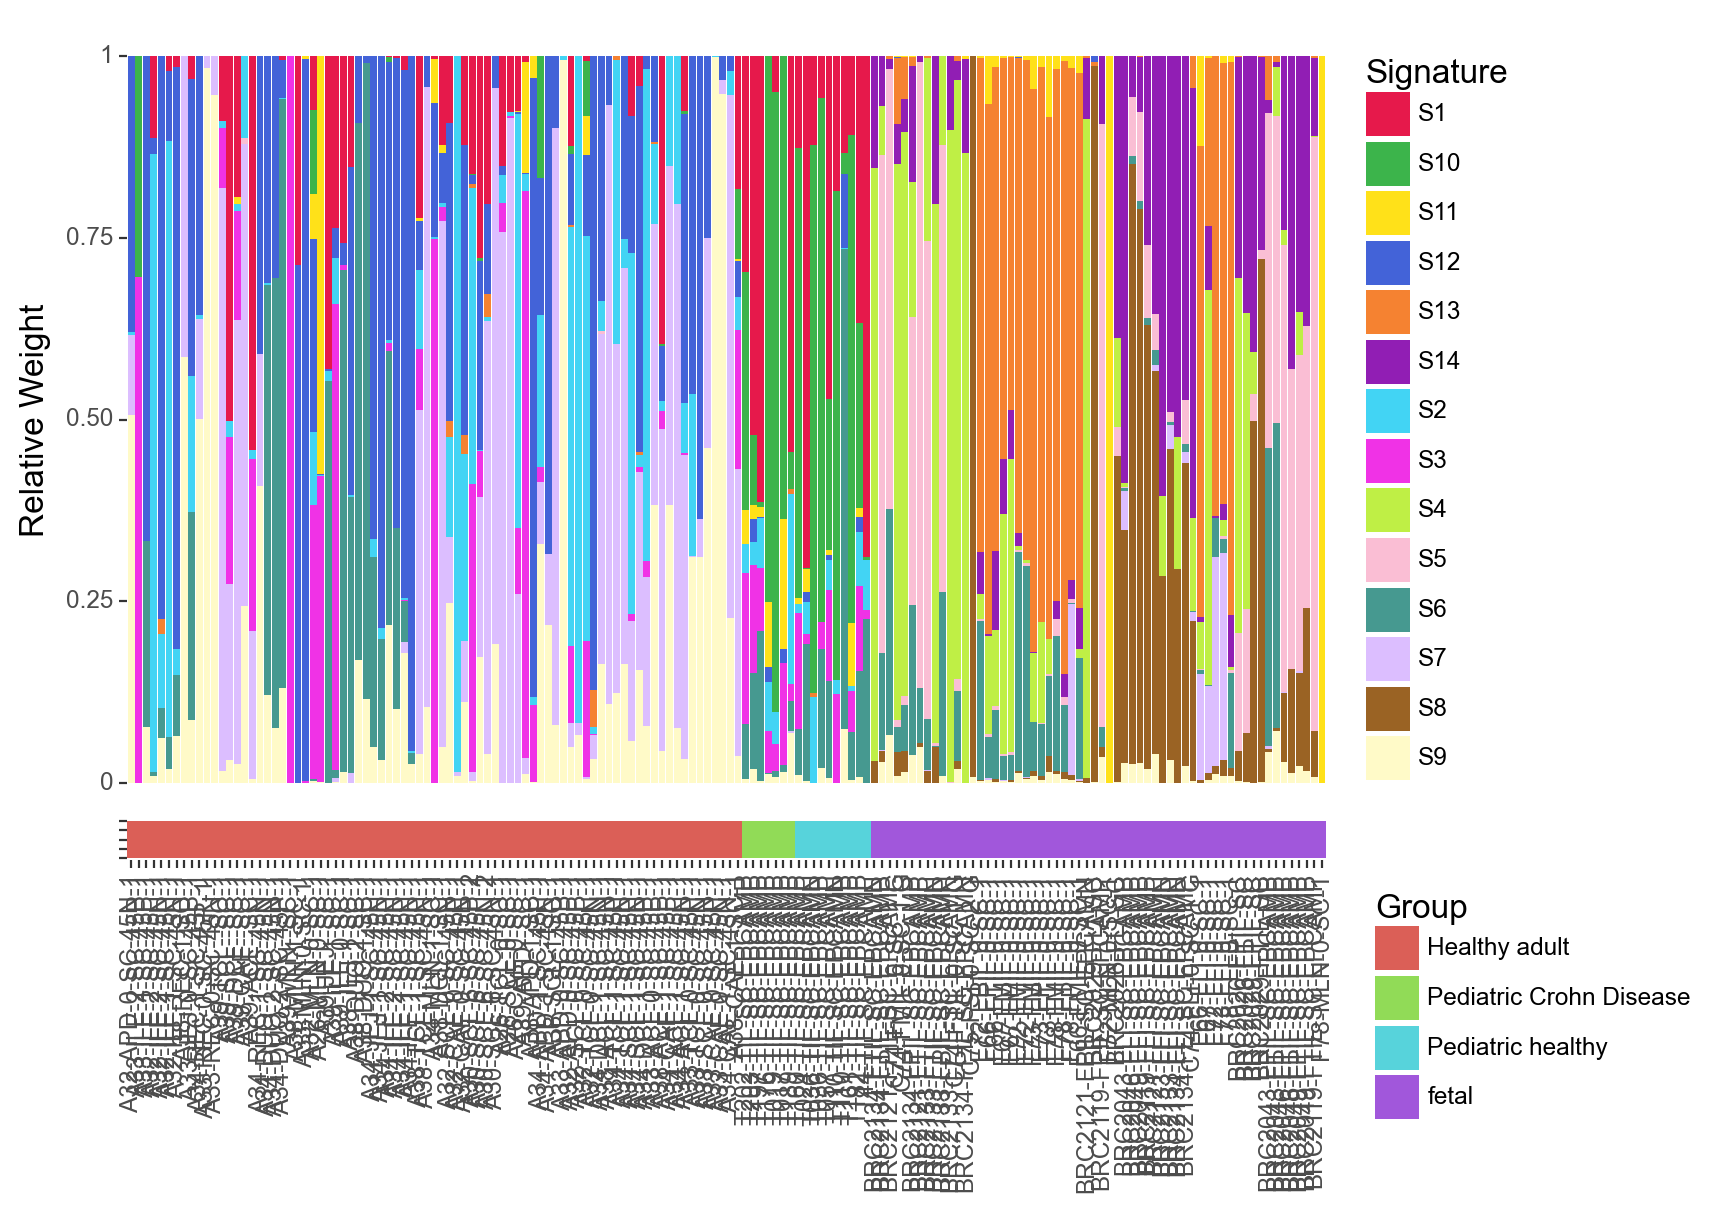

In [6]:
sorted_grouping = gca_meta.sort_values(by=['diagnosis', 'region'])
plt_ra = best_decomp.plot_relative_weight(sorted_grouping['diagnosis'])
plt_ra

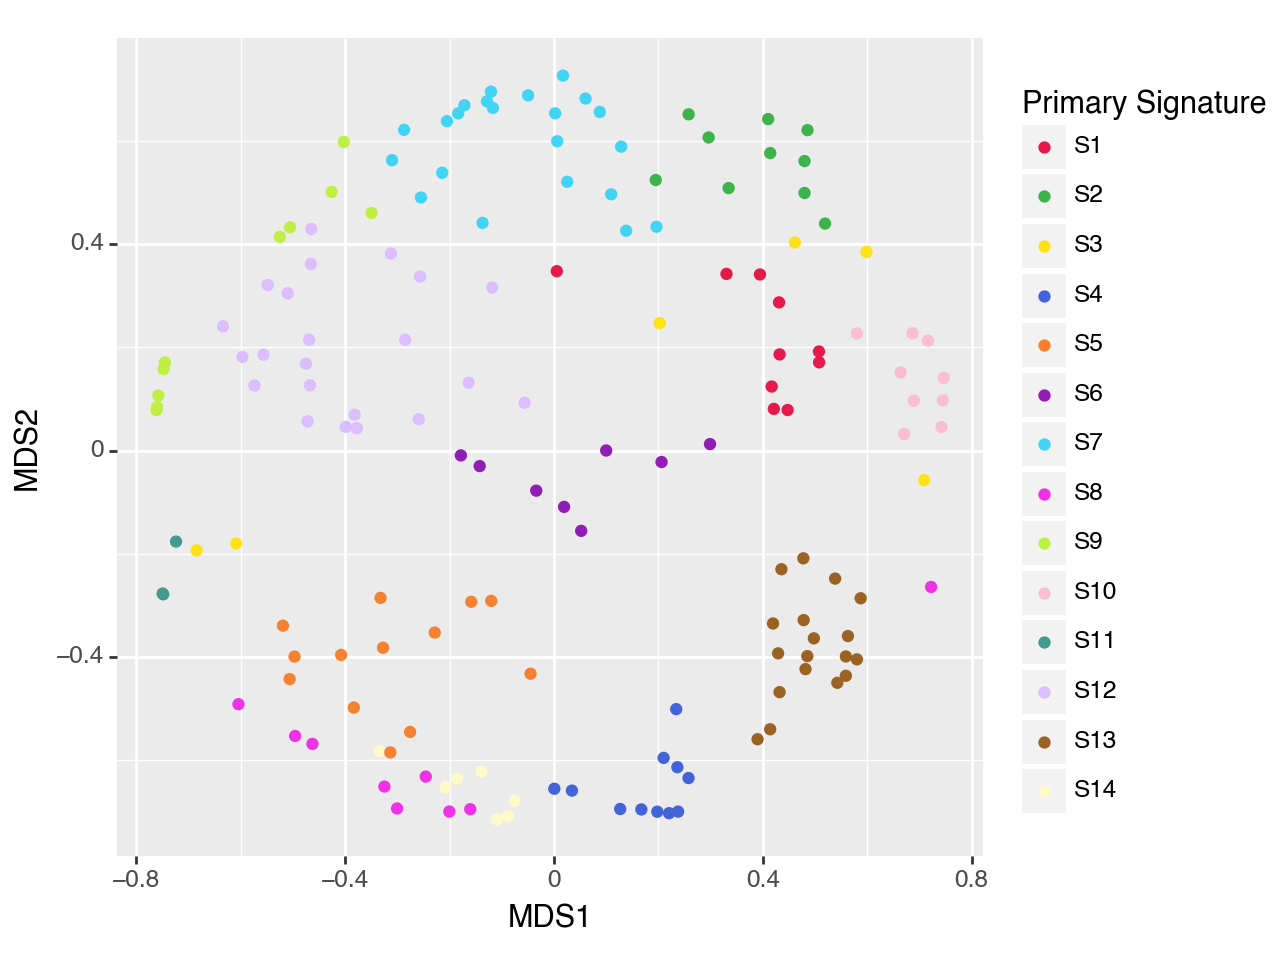

<Figure Size: (640 x 480)>

In [10]:
best_decomp.plot_pcoa()

In [ ]:
best_decomp.representative_signatures(threshold=0.9)

In [ ]:
best_decomp.monodominant_samples(threshold=0.9)